<a href="https://colab.research.google.com/github/emjorgen/EnvDatSci22/blob/master/NAM_Z3_IVT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#attach to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd ./drive/MyDrive/EnvDataSci/For_Ellen/Ran_Feng_isotope_sensitivity/new_runs/scaled

/content/drive/.shortcut-targets-by-id/1-n_IOvxe34aCTrxrJlY5ZJYz-K0wNK0_/For_Ellen/Ran_Feng_isotope_sensitivity/new_runs/scaled


In [ ]:
!pip install pysal
!pip install libpysal
!pip install geopandas
!pip install netCDF4
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.5 MB/s 
     |████████████████████████████████| 116 kB 34.4 MB/s 
     |████████████████████████████████| 2.4 MB 58.7 MB/s 
     |████████████████████████████████| 5.7 MB 56.2 MB/s 
     |████████████████████████████████| 243 kB 54.8 MB/s 
     |████████████████████████████████| 60 kB 8.0 MB/s 
     |████████████████████████████████| 147 kB 50.1 MB/s 
     |████████████████████████████████| 41 kB 641 kB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 220 kB 55.0 MB/s 
     |████████████████████████████████| 46 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 47.6 MB/s 
     |████████████████████████████████| 179 kB 55.8 MB/s 
     |████████████████████████████████| 2.2 MB 62.1 MB/s 
     |████████████████████████████████| 16.6 MB 219 kB/s 
     |████████████████████████████████| 7

In [ ]:
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.9 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.9 MB 47.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 45.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 53.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 52.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 46.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████

In [ ]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import interactive
from matplotlib import rcParams
import xarray as xr
interactive(True)
import netCDF4
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.6.2-CAPI-1.10.2 4d2925d6) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [ ]:
import cartopy.crs as ccrs

In [ ]:
#bring in uniform warming files

#uniform warming x1; integrated vapor transport, geopotential height, and surface temperature
ds1 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.uniwar_1.IVT.0011.0040.nc')
ds2 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.uniwar_1.Z3.0011.0040.nc')
ds13 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.uniwar_1.TS.0011.0040.nc')

#uniform warming x2
ds3 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.uniwar_2.IVT.0011.0040.nc')
ds4 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.uniwar_2.Z3.0011.0040.nc')
ds14 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.uniwar_2.TS.0011.0040.nc')

In [ ]:
cd ../

/content/drive/.shortcut-targets-by-id/1-n_IOvxe34aCTrxrJlY5ZJYz-K0wNK0_/For_Ellen/Ran_Feng_isotope_sensitivity/new_runs


In [ ]:
cd ./mhw

/content/drive/.shortcut-targets-by-id/1-n_IOvxe34aCTrxrJlY5ZJYz-K0wNK0_/For_Ellen/Ran_Feng_isotope_sensitivity/new_runs/mhw


In [ ]:
#bring in marine heatwave files

#mhw 1
ds5 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.mhw_1.IVT.0011.0040.nc')
ds6 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.mhw_1.Z3.0011.0040.nc')
ds15 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.mhw_1.TS.0011.0040.nc')

# #mhw 2
ds7 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.mhw_2.IVT.0011.0040.nc')
ds8 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.mhw_2.Z3.0011.0040.nc')
ds16 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.mhw_2.TS.0011.0040.nc')

#mhw 3
ds9 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.mhw_3.IVT.0011.0040.nc')
ds10 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.mhw_3.Z3.0011.0040.nc')
ds17 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.mhw_3.TS.0011.0040.nc')

#mhw 4
ds11 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.mhw_4.IVT.0011.0040.nc')
ds12 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.mhw_4.Z3.0011.0040.nc')
ds18 = xr.open_dataset('f.ie12.E1850C5.f09_f09.PLIO_c.mhw_4.TS.0011.0040.nc')

In [ ]:
#set lat and lon bounds

#uniform warming
ivt_uni1 = ds1.IVT.sel(lat=slice(-30, 60), lon=slice(120, 270))
lat_ivt_u1 = ds1.lat.sel(lat=slice(-30, 60))
lon_ivt_u1 = ds1.lon.sel(lon=slice(120, 270))

sst_uni1 = ds13.TS.sel(lat=slice(-30, 60), lon=slice(120, 270))
lat_sst_u13 = ds13.lat.sel(lat=slice(-30, 60))
lon_sst_u13 = ds13.lon.sel(lon=slice(120, 270))

# gph_uni1 = ds2.Z3.sel(lat=slice(-30, 60), lon=slice(120, 270))
# lat_gph_u2 = ds2.lat.sel(lat=slice(-30, 60))
# lon_gph_u2 = ds2.lon.sel(lon=slice(120, 270))


ivt_uni2 = ds3.IVT.sel(lat=slice(-30, 60), lon=slice(120, 270))
lat_ivt_u3 = ds3.lat.sel(lat=slice(-30, 60))
lon_ivt_u3 = ds3.lon.sel(lon=slice(120, 270))

sst_uni2 = ds14.TS.sel(lat=slice(-30, 60), lon=slice(120, 270))
lat_sst_u14 = ds14.lat.sel(lat=slice(-30, 60))
lon_sst_u14 = ds14.lon.sel(lon=slice(120, 270))

# gph_uni2 = ds4.Z3.sel(lat=slice(-30, 60), lon=slice(120, 270))
# lat_gph_u4 = ds4.lat.sel(lat=slice(-30, 60))
# lon_gph_u4 = ds4.lon.sel(lon=slice(120, 270))

#marine heatwave

ivt_mhw1 = ds5.IVT.sel(lat=slice(-30, 60), lon=slice(120, 270))
lat_ivt5 = ds5.lat.sel(lat=slice(-30, 60))
lon_ivt5 = ds5.lon.sel(lon=slice(120, 270))

sst_mhw1 = ds15.TS.sel(lat=slice(-30, 60), lon=slice(120, 270))
lat_sst15 = ds15.lat.sel(lat=slice(-30, 60))
lon_sst15 = ds15.lon.sel(lon=slice(120, 270))

# gph_mhw1 = ds6.Z3.sel(lat=slice(-30, 60), lon=slice(120, 270))
# lat_gph6 = ds6.lat.sel(lat=slice(-30, 60))
# lon_gph6 = ds6.lon.sel(lon=slice(120, 270))


ivt_mhw2 = ds7.IVT.sel(lat=slice(-30, 60), lon=slice(120, 270))
lat_ivt7 = ds7.lat.sel(lat=slice(-30, 60))
lon_ivt7 = ds7.lon.sel(lon=slice(120, 270))

sst_mhw2 = ds16.TS.sel(lat=slice(-30, 60), lon=slice(120, 270))
lat_sst16 = ds16.lat.sel(lat=slice(-30, 60))
lon_sst16 = ds16.lon.sel(lon=slice(120, 270))

# gph_mhw2 = ds8.Z3.sel(lat=slice(-30, 60), lon=slice(120, 270))
# lat_gph8 = ds8.lat.sel(lat=slice(-30, 60))
# lon_gph8 = ds8.lon.sel(lon=slice(120, 270))


ivt_mhw3 = ds9.IVT.sel(lat=slice(-30, 60), lon=slice(120, 270))
lat_ivt9 = ds9.lat.sel(lat=slice(-30, 60))
lon_ivt9 = ds9.lon.sel(lon=slice(120, 270))

sst_mhw3 = ds17.TS.sel(lat=slice(-30, 60), lon=slice(120, 270))
lat_sst17 = ds17.lat.sel(lat=slice(-30, 60))
lon_sst17 = ds17.lon.sel(lon=slice(120, 270))

# gph_mhw3 = ds10.Z3.sel(lat=slice(-30, 60), lon=slice(120, 270))
# lat_gph10 = ds10.lat.sel(lat=slice(-30, 60))
# lon_gph10 = ds10.lon.sel(lon=slice(120, 270))


ivt_mhw4 = ds11.IVT.sel(lat=slice(-30, 60), lon=slice(120, 270))
lat_ivt11 = ds11.lat.sel(lat=slice(-30, 60))
lon_ivt11 = ds11.lon.sel(lon=slice(120, 270))

sst_mhw4 = ds18.TS.sel(lat=slice(-30, 60), lon=slice(120, 270))
lat_sst18 = ds18.lat.sel(lat=slice(-30, 60))
lon_sst18 = ds18.lon.sel(lon=slice(120, 270))

# gph_mhw4 = ds12.Z3.sel(lat=slice(-30, 60), lon=slice(120, 270))
# lat_gph12 = ds12.lat.sel(lat=slice(-30, 60))
# lon_gph12 = ds12.lon.sel(lon=slice(120, 270))

In [ ]:
#preprocess IVT

#uniform warming
ivt_uni1_2d = ivt_uni1.values
ntime, nrow_uni, ncol_uni = ivt_uni1_2d.shape
ivt_uni1_2d = np.reshape(ivt_uni1_2d, (ntime, nrow_uni*ncol_uni), order='F')

pca_ivt_uni1 = PCA(n_components=6)
pca_ivt_uni1.fit(ivt_uni1_2d)
ivt_uni1_2d_pcs = pca_ivt_uni1.inverse_transform(pca_ivt_uni1.transform(ivt_uni1_2d))
print(pca_ivt_uni1.explained_variance_ratio_.sum())


ivt_uni2_2d = ivt_uni2.values
ntime, nrow_uni, ncol_uni = ivt_uni2_2d.shape
ivt_uni2_2d = np.reshape(ivt_uni2_2d, (ntime, nrow_uni*ncol_uni), order='F')

pca_ivt_uni2 = PCA(n_components=6)
pca_ivt_uni2.fit(ivt_uni2_2d)
ivt_uni2_2d_pcs = pca_ivt_uni2.inverse_transform(pca_ivt_uni2.transform(ivt_uni2_2d))
print(pca_ivt_uni2.explained_variance_ratio_.sum())

#marine heatwaves
ivt_mhw1_2d = ivt_mhw1.values
ntime, nrow_ivt, ncol_ivt = ivt_mhw1_2d.shape
ivt_mhw1_2d = np.reshape(ivt_mhw1_2d, (ntime, nrow_ivt*ncol_ivt), order='F')

pca_ivt_mhw1 = PCA(n_components=6)
pca_ivt_mhw1.fit(ivt_mhw1_2d)
ivt_mhw1_2d_pcs = pca_ivt_mhw1.inverse_transform(pca_ivt_mhw1.transform(ivt_mhw1_2d))
print(pca_ivt_mhw1.explained_variance_ratio_.sum())


ivt_mhw2_2d = ivt_mhw2.values
ntime, nrow_ivt, ncol_ivt = ivt_mhw2_2d.shape
ivt_mhw2_2d = np.reshape(ivt_mhw2_2d, (ntime, nrow_ivt*ncol_ivt), order='F')

pca_ivt_mhw2 = PCA(n_components=6)
pca_ivt_mhw2.fit(ivt_mhw2_2d)
ivt_mhw2_2d_pcs = pca_ivt_mhw1.inverse_transform(pca_ivt_mhw2.transform(ivt_mhw2_2d))
print(pca_ivt_mhw2.explained_variance_ratio_.sum())


ivt_mhw3_2d = ivt_mhw3.values
ntime, nrow_ivt, ncol_ivt = ivt_mhw3_2d.shape
ivt_mhw3_2d = np.reshape(ivt_mhw3_2d, (ntime, nrow_ivt*ncol_ivt), order='F')

pca_ivt_mhw3 = PCA(n_components=6)
pca_ivt_mhw3.fit(ivt_mhw3_2d)
ivt_mhw3_2d_pcs = pca_ivt_mhw3.inverse_transform(pca_ivt_mhw3.transform(ivt_mhw3_2d))
print(pca_ivt_mhw3.explained_variance_ratio_.sum())


ivt_mhw4_2d = ivt_mhw4.values
ntime, nrow_ivt, ncol_ivt = ivt_mhw4_2d.shape
ivt_mhw4_2d = np.reshape(ivt_mhw4_2d, (ntime, nrow_ivt*ncol_ivt), order='F')

pca_ivt_mhw4 = PCA(n_components=6)
pca_ivt_mhw4.fit(ivt_mhw4_2d)
ivt_mhw4_2d_pcs = pca_ivt_mhw1.inverse_transform(pca_ivt_mhw4.transform(ivt_mhw4_2d))
print(pca_ivt_mhw4.explained_variance_ratio_.sum())

0.98081887
0.97787
0.9763503
0.9781294
0.9776983
0.98021257


In [ ]:
sst_uni1_2d = sst_uni1.values
ntime, nrow_unig, ncol_unig = sst_uni1_2d.shape
sst_uni1_2d = np.reshape(sst_uni1_2d, (ntime, nrow_unig*ncol_unig), order='F')

pca_sst_uni1 = PCA(n_components=6)
pca_sst_uni1.fit(sst_uni1_2d)
sst_uni1_2d_pcs = pca_sst_uni1.inverse_transform(pca_sst_uni1.transform(sst_uni1_2d))
print(pca_sst_uni1.explained_variance_ratio_.sum())


sst_uni2_2d = sst_uni2.values
ntime, nrow_unig, ncol_unig = sst_uni2_2d.shape
sst_uni2_2d = np.reshape(sst_uni2_2d, (ntime, nrow_unig*ncol_unig), order='F')

pca_sst_uni2 = PCA(n_components=6)
pca_sst_uni2.fit(sst_uni2_2d)
sst_uni2_2d_pcs = pca_sst_uni2.inverse_transform(pca_sst_uni2.transform(sst_uni2_2d))
print(pca_sst_uni2.explained_variance_ratio_.sum())

#marine heatwaves
sst_mhw1_2d = sst_mhw1.values
ntime, nrow_sst, ncol_sst = sst_mhw1_2d.shape
sst_mhw1_2d = np.reshape(sst_mhw1_2d, (ntime, nrow_sst*ncol_sst), order='F')

pca_sst_mhw1 = PCA(n_components=6)
pca_sst_mhw1.fit(sst_mhw1_2d)
sst_mhw1_2d_pcs = pca_sst_mhw1.inverse_transform(pca_sst_mhw1.transform(sst_mhw1_2d))
print(pca_sst_mhw1.explained_variance_ratio_.sum())


sst_mhw2_2d = sst_mhw2.values
ntime, nrow_sst, ncol_sst = sst_mhw2_2d.shape
sst_mhw2_2d = np.reshape(sst_mhw2_2d, (ntime, nrow_sst*ncol_sst), order='F')

pca_sst_mhw2 = PCA(n_components=6)
pca_sst_mhw2.fit(sst_mhw2_2d)
sst_mhw2_2d_pcs = pca_sst_mhw1.inverse_transform(pca_sst_mhw2.transform(sst_mhw2_2d))
print(pca_sst_mhw2.explained_variance_ratio_.sum())


sst_mhw3_2d = sst_mhw3.values
ntime, nrow_sst, ncol_sst = sst_mhw3_2d.shape
sst_mhw3_2d = np.reshape(sst_mhw3_2d, (ntime, nrow_sst*ncol_sst), order='F')

pca_sst_mhw3 = PCA(n_components=6)
pca_sst_mhw3.fit(sst_mhw3_2d)
sst_mhw3_2d_pcs = pca_sst_mhw3.inverse_transform(pca_sst_mhw3.transform(sst_mhw3_2d))
print(pca_sst_mhw3.explained_variance_ratio_.sum())


sst_mhw4_2d = sst_mhw4.values
ntime, nrow_sst, ncol_sst = sst_mhw4_2d.shape
sst_mhw4_2d = np.reshape(sst_mhw4_2d, (ntime, nrow_sst*ncol_sst), order='F')

pca_sst_mhw4 = PCA(n_components=6)
pca_sst_mhw4.fit(sst_mhw4_2d)
sst_mhw4_2d_pcs = pca_sst_mhw1.inverse_transform(pca_sst_mhw4.transform(sst_mhw4_2d))
print(pca_sst_mhw4.explained_variance_ratio_.sum())

0.9994809
0.9994952
0.9994122
0.9994282
0.9994222
0.9994109


In [ ]:
#preprocess gph

#uniform warming
# gph_uni1_2d = gph_uni1.values
# ntime, nrow_unig, ncol_unig = gph_uni1_2d.shape
# gph_uni1_2d = np.reshape(gph_uni1_2d, (ntime, nrow_unig*ncol_unig), order='F')

# pca_gph_uni1 = PCA(n_components=6)
# pca_gph_uni1.fit(gph_uni1_2d)
# gph_uni1_2d_pcs = pca_gph_uni1.inverse_transform(pca_gph_uni1.transform(gph_uni1_2d))
# print(pca_gph_uni1.explained_variance_ratio_.sum())


# gph_uni2_2d = gph_uni2.values
# ntime, nrow_unig, ncol_unig = gph_uni2_2d.shape
# gph_uni2_2d = np.reshape(gph_uni2_2d, (ntime, nrow_unig*ncol_unig), order='F')

# pca_gph_uni2 = PCA(n_components=6)
# pca_gph_uni2.fit(gph_uni2_2d)
# gph_uni2_2d_pcs = pca_gph_uni2.inverse_transform(pca_gph_uni2.transform(gph_uni2_2d))
# print(pca_gph_uni2.explained_variance_ratio_.sum())

# #marine heatwaves
# gph_mhw1_2d = gph_mhw1.values
# ntime, nrow_gph, ncol_gph = gph_mhw1_2d.shape
# gph_mhw1_2d = np.reshape(gph_mhw1_2d, (ntime, nrow_gph*ncol_gph), order='F')

# pca_gph_mhw1 = PCA(n_components=6)
# pca_gph_mhw1.fit(gph_mhw1_2d)
# gph_mhw1_2d_pcs = pca_gph_mhw1.inverse_transform(pca_gph_mhw1.transform(gph_mhw1_2d))
# print(pca_gph_mhw1.explained_variance_ratio_.sum())


# gph_mhw2_2d = gph_mhw2.values
# ntime, nrow_gph, ncol_gph = gph_mhw2_2d.shape
# gph_mhw2_2d = np.reshape(gph_mhw2_2d, (ntime, nrow_gph*ncol_gph), order='F')

# pca_gph_mhw2 = PCA(n_components=6)
# pca_gph_mhw2.fit(gph_mhw2_2d)
# gph_mhw2_2d_pcs = pca_gph_mhw1.inverse_transform(pca_gph_mhw2.transform(gph_mhw2_2d))
# print(pca_gph_mhw2.explained_variance_ratio_.sum())


# gph_mhw3_2d = gph_mhw3.values
# ntime, nrow_gph, ncol_gph = gph_mhw3_2d.shape
# gph_mhw3_2d = np.reshape(gph_mhw3_2d, (ntime, nrow_gph*ncol_gph), order='F')

# pca_gph_mhw3 = PCA(n_components=6)
# pca_gph_mhw3.fit(gph_mhw3_2d)
# gph_mhw3_2d_pcs = pca_gph_mhw3.inverse_transform(pca_gph_mhw3.transform(gph_mhw3_2d))
# print(pca_gph_mhw3.explained_variance_ratio_.sum())


# gph_mhw4_2d = gph_mhw4.values
# ntime, nrow_gph, ncol_gph = gph_mhw4_2d.shape
# gph_mhw4_2d = np.reshape(gph_mhw4_2d, (ntime, nrow_gph*ncol_gph), order='F')

# pca_gph_mhw4 = PCA(n_components=6)
# pca_gph_mhw4.fit(gph_mhw4_2d)
# gph_mhw4_2d_pcs = pca_gph_mhw1.inverse_transform(pca_gph_mhw4.transform(gph_mhw4_2d))
# print(pca_gph_mhw4.explained_variance_ratio_.sum())

In [ ]:
#CCA for IVT of uniform warming x1
cca = CCA(n_components=1)
ivt_uni1_c, sst_uni1_c = cca.fit_transform(ivt_uni1_2d, sst_uni1_2d)

ivt_uni1_c /= ivt_uni1_c.std(axis=0)
sst_uni1_c /= sst_uni1_c.std(axis=0)

A1 = cca.x_weights_
B1 = cca.y_weights_
A1 = np.reshape(A1, (nrow_ivt,ncol_ivt), order='F')

BB1 = np.ones([nrow_sst*ncol_sst, 1])
BB1 = BB1.astype(B1.dtype)
BB1 = BB1.reshape([nrow_sst,ncol_sst], order='F')

In [ ]:
#CCA for IVT of uniform warming x2
cca = CCA(n_components=1)
ivt_uni2_c, sst_uni2_c = cca.fit_transform(ivt_uni2_2d, sst_uni2_2d)

ivt_uni2_c /= ivt_uni2_c.std(axis=0)
sst_uni2_c /= sst_uni2_c.std(axis=0)

A2 = cca.x_weights_
B2 = cca.y_weights_
A2 = np.reshape(A2, (nrow_ivt,ncol_ivt), order='F')

BB2 = np.ones([nrow_sst*ncol_sst, 1])
BB2 = BB2.astype(B2.dtype)
BB2 = BB2.reshape([nrow_sst,ncol_sst], order='F')

In [ ]:
#CCA for IVT and GPH of MHW1
cca = CCA(n_components=1)
ivt_mhw1_c, sst_mhw1_c = cca.fit_transform(ivt_mhw1_2d, sst_mhw1_2d)

ivt_mhw1_c /= ivt_mhw1_c.std(axis=0)
sst_mhw1_c /= sst_mhw1_c.std(axis=0)

A3 = cca.x_weights_
B3 = cca.y_weights_
A3 = np.reshape(A3, (nrow_ivt,ncol_ivt), order='F')

BB3 = np.ones([nrow_sst*ncol_sst, 1])
BB3 = BB3.astype(B3.dtype)
BB3 = BB3.reshape([nrow_sst,ncol_sst], order='F')

In [ ]:
#CCA for IVT and GPH of MHW2
cca = CCA(n_components=1)
ivt_mhw2_c, sst_mhw2_c = cca.fit_transform(ivt_mhw2_2d, sst_mhw2_2d)

ivt_mhw2_c /= ivt_mhw2_c.std(axis=0)
sst_mhw2_c /= sst_mhw2_c.std(axis=0)

A4 = cca.x_weights_
B4 = cca.y_weights_
A4 = np.reshape(A4, (nrow_ivt,ncol_ivt), order='F')

BB4 = np.ones([nrow_sst*ncol_sst, 1])
BB4 = BB4.astype(B4.dtype)
BB4 = BB4.reshape([nrow_sst,ncol_sst], order='F')

In [ ]:
#CCA for IVT and GPH of MHW3
cca = CCA(n_components=1)
ivt_mhw3_c, sst_mhw3_c = cca.fit_transform(ivt_mhw3_2d, sst_mhw3_2d)

ivt_mhw3_c /= ivt_mhw3_c.std(axis=0)
sst_mhw3_c /= sst_mhw3_c.std(axis=0)

A5 = cca.x_weights_
B5 = cca.y_weights_
A5 = np.reshape(A5, (nrow_ivt,ncol_ivt), order='F')

BB5 = np.ones([nrow_sst*ncol_sst, 1])
BB5 = BB5.astype(B5.dtype)
BB5 = BB5.reshape([nrow_sst,ncol_sst], order='F')

In [ ]:
#CCA for IVT and GPH of MHW4
cca = CCA(n_components=1)
ivt_mhw4_c, sst_mhw4_c = cca.fit_transform(ivt_mhw4_2d, sst_mhw4_2d)

ivt_mhw4_c /= ivt_mhw4_c.std(axis=0)
sst_mhw4_c /= sst_mhw4_c.std(axis=0)

A6 = cca.x_weights_
B6 = cca.y_weights_
A6 = np.reshape(A6, (nrow_ivt,ncol_ivt), order='F')

BB6 = np.ones([nrow_sst*ncol_sst, 1])
BB6 = BB6.astype(B6.dtype)
BB6 = BB6.reshape([nrow_sst,ncol_sst], order='F')

In [ ]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.8.5.post1
Uninstalling Shapely-1.8.5.post1:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/Shapely-1.8.5.post1.dist-info/*
    /usr/local/lib/python3.8/dist-packages/Shapely.libs/libgeos-35e678a0.so.3.10.3
    /usr/local/lib/python3.8/dist-packages/Shapely.libs/libgeos_c-c8ec7514.so.1.16.1
    /usr/local/lib/python3.8/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.8.5.post1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 200 kB 48.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadat

Text(0.5, 1.0, 'IVT U1 Anomaly CCA')

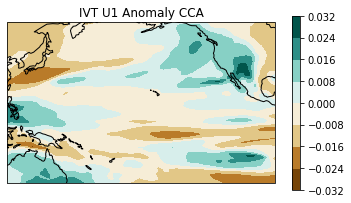

In [ ]:
#plot IVT anomoly CCA

fig = plt.figure()
extent = [120, 270, -30, 60]

#uniform warming x1
ax1 = fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=180))
x1, y1 = np.meshgrid(lon_ivt_u1, lat_ivt_u1)
cs = ax1.contourf(x1, y1, A1,
                  transform=ccrs.PlateCarree(),
                  cmap='BrBG')

cb=fig.colorbar(cs, ax=ax1, shrink=0.8, aspect=20)
ax1.coastlines()
ax1.set_extent(extent)
ax1.set_ylim([-30, 60])
ax1.set_title('IVT U1 Anomaly CCA')

Text(0.5, 1.0, 'IVT U2 Anomaly CCA')

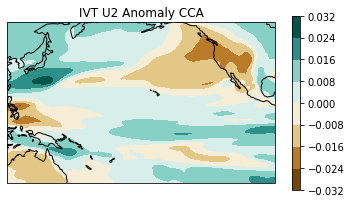

In [ ]:
fig = plt.figure()
extent = [120, 270, -30, 60]

#uniform warming x2
ax1 = fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=180))
x1, y1 = np.meshgrid(lon_ivt_u3, lat_ivt_u3)
cs = ax1.contourf(x1, y1, A2,
                  transform=ccrs.PlateCarree(),
                  cmap='BrBG')

cb=fig.colorbar(cs, ax=ax1, shrink=0.8, aspect=20)
ax1.coastlines()
ax1.set_extent(extent)
ax1.set_ylim([-30, 60])
ax1.set_title('IVT U2 Anomaly CCA')

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


Text(0.5, 1.0, 'IVT MHW1 Anomaly CCA')

/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
/usr/local/lib/python3.8/dist-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: __len_

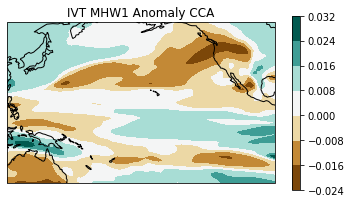

In [ ]:
fig = plt.figure()
extent = [120, 270, -30, 60]

#MHW 1
ax1 = fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=180))
x1, y1 = np.meshgrid(lon_ivt5, lat_ivt5)
cs = ax1.contourf(x1, y1, A3,
                  transform=ccrs.PlateCarree(),
                  cmap='BrBG')

cb=fig.colorbar(cs, ax=ax1, shrink=0.8, aspect=20)
ax1.coastlines()
ax1.set_extent(extent)
ax1.set_ylim([-30, 60])
ax1.set_title('IVT MHW1 Anomaly CCA')

Text(0.5, 1.0, 'IVT MHW2 Anomaly CCA')

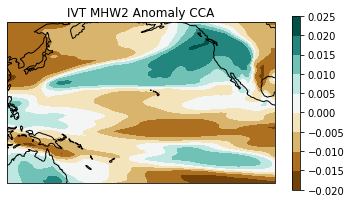

In [ ]:
fig = plt.figure()
extent = [120, 270, -30, 60]

#MHW 2
ax1 = fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=180))
x1, y1 = np.meshgrid(lon_ivt7, lat_ivt7)
cs = ax1.contourf(x1, y1, A4,
                  transform=ccrs.PlateCarree(),
                  cmap='BrBG')

cb=fig.colorbar(cs, ax=ax1, shrink=0.8, aspect=20)
ax1.coastlines()
ax1.set_extent(extent)
ax1.set_ylim([-30, 60])
ax1.set_title('IVT MHW2 Anomaly CCA')

Text(0.5, 1.0, 'IVT MHW3 Anomaly CCA')

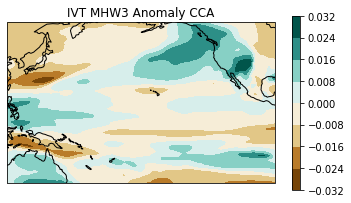

In [ ]:
fig = plt.figure()
extent = [120, 270, -30, 60]

#MHW 3
ax1 = fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=180))
x1, y1 = np.meshgrid(lon_ivt9, lat_ivt9)
cs = ax1.contourf(x1, y1, A5,
                  transform=ccrs.PlateCarree(),
                  cmap='BrBG')

cb=fig.colorbar(cs, ax=ax1, shrink=0.8, aspect=20)
ax1.coastlines()
ax1.set_extent(extent)
ax1.set_ylim([-30, 60])
ax1.set_title('IVT MHW3 Anomaly CCA')

Text(0.5, 1.0, 'IVT MHW4 Anomaly CCA')

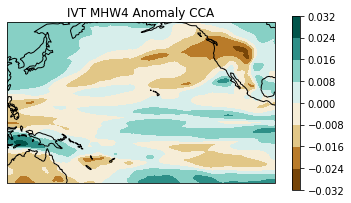

In [ ]:
fig = plt.figure()
extent = [120, 270, -30, 60]

#MHW 4
ax1 = fig.add_subplot(projection=ccrs.PlateCarree(central_longitude=180))
x1, y1 = np.meshgrid(lon_ivt11, lat_ivt11)
cs = ax1.contourf(x1, y1, A6,
                  transform=ccrs.PlateCarree(),
                  cmap='BrBG')

cb=fig.colorbar(cs, ax=ax1, shrink=0.8, aspect=20)
ax1.coastlines()
ax1.set_extent(extent)
ax1.set_ylim([-30, 60])
ax1.set_title('IVT MHW4 Anomaly CCA')